# Загрузка и первичный анализ данных

In [1]:
# Загрузка данных
import pandas as pd
data = pd.read_csv("melbourne_housing.csv.zst")

In [2]:
data.shape

(34857, 21)

In [3]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
# Первые 5 строк датасета
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

In [6]:
# Удаление колонок, содержащих пустые значения
(data.shape, data.dropna(axis=1, how='any').shape)

((34857, 21), (34857, 7))

In [7]:
# Удаление строк, содержащих пустые значения
(data.shape, data.dropna(axis=0, how='any').shape)

((34857, 21), (8887, 21))

In [8]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
display(data.head(), data.fillna(0).head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,0.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,0.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## "Внедрение значений" - импьютация (imputation)

In [9]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
lines = data.shape[0]
for col in data.columns:
  # Количество пустых значений 
  temp_null_count = data[data[col].isnull()].shape[0]
  dt = str(data[col].dtype)
  if temp_null_count > 0 and (dt == 'float64' or dt == 'int64' or dt == 'object'):
    num_cols.append(col)
    temp_perc = round((temp_null_count / lines) * 100.0, 2)
    print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Price. Тип данных float64. Количество пустых значений 7610, 21.83%.
Колонка Distance. Тип данных float64. Количество пустых значений 1, 0.0%.
Колонка Postcode. Тип данных float64. Количество пустых значений 1, 0.0%.
Колонка Bedroom2. Тип данных float64. Количество пустых значений 8217, 23.57%.
Колонка Bathroom. Тип данных float64. Количество пустых значений 8226, 23.6%.
Колонка Car. Тип данных float64. Количество пустых значений 8728, 25.04%.
Колонка Landsize. Тип данных float64. Количество пустых значений 11810, 33.88%.
Колонка BuildingArea. Тип данных float64. Количество пустых значений 21115, 60.58%.
Колонка YearBuilt. Тип данных float64. Количество пустых значений 19306, 55.39%.
Колонка CouncilArea. Тип данных object. Количество пустых значений 3, 0.01%.
Колонка Lattitude. Тип данных float64. Количество пустых значений 7976, 22.88%.
Колонка Longtitude. Тип данных float64. Количество пустых значений 7976, 22.88%.
Колонка Regionname. Тип данных object. Количество пустых значе

In [10]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,1140000.0,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

def test_num_impute_col(dataset, column, strategy_param):
  temp_data = dataset[[column]]

  indicator = MissingIndicator()
  mask_missing_values_only = indicator.fit_transform(temp_data)

  imp_num = SimpleImputer(strategy=strategy_param)
  data_num_imp = imp_num.fit_transform(temp_data)

  filled_data = data_num_imp[mask_missing_values_only]

  return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [12]:
display(data[['Price']].describe())
display(test_num_impute_col(data, 'Price', 'mean'))
display(test_num_impute_col(data, 'Price', 'median'))

,Price
count,2.724700e+04
mean,1.050173e+06
std,6.414671e+05
min,8.500000e+04
25%,6.350000e+05
50%,8.700000e+05
75%,1.295000e+06
max,1.120000e+07


('Price', 'mean', 7610, 1050173.344955408, 1050173.344955408)

('Price', 'median', 7610, 870000.0, 870000.0)

In [13]:
display(data[['Distance']].describe())
display(test_num_impute_col(data, 'Distance', 'mean'))
display(test_num_impute_col(data, 'Distance', 'median'))

,Distance
count,34856.000000
mean,11.184929
std,6.788892
min,0.000000
25%,6.400000
50%,10.300000
75%,14.000000
max,48.100000


('Distance', 'mean', 1, 11.18492942391554, 11.18492942391554)

('Distance', 'median', 1, 10.3, 10.3)

# Обработка пропусков в категориальных данных 

In [14]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
lines = data.shape[0]
for col in data.columns:
  # Количество пустых значений 
  temp_null_count = data[data[col].isnull()].shape[0]
  dt = str(data[col].dtype)
  if temp_null_count > 0 and (dt == 'object'):
    cat_cols.append(col)
    temp_perc = round((temp_null_count / lines) * 100.0, 2)
    print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CouncilArea. Тип данных object. Количество пустых значений 3, 0.01%.
Колонка Regionname. Тип данных object. Количество пустых значений 3, 0.01%.


In [15]:
# Удаление строк, содержащих пустые значения
(data.shape, data.dropna(axis=0, how='any', subset=['CouncilArea', 'Regionname']).shape)

((34857, 21), (34854, 21))

In [16]:
data['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', nan],
      dtype=object)

In [17]:
import numpy as np

# Импьютация наиболее частыми значениями
most_frequent_imputed = SimpleImputer(
  missing_values=np.nan,
  strategy='most_frequent'
).fit_transform(data[['CouncilArea']])

# Пустые значения отсутствуют
np.unique(most_frequent_imputed)

array(['Banyule City Council', 'Bayside City Council',
       'Boroondara City Council', 'Brimbank City Council',
       'Cardinia Shire Council', 'Casey City Council',
       'Darebin City Council', 'Frankston City Council',
       'Glen Eira City Council', 'Greater Dandenong City Council',
       'Hobsons Bay City Council', 'Hume City Council',
       'Kingston City Council', 'Knox City Council',
       'Macedon Ranges Shire Council', 'Manningham City Council',
       'Maribyrnong City Council', 'Maroondah City Council',
       'Melbourne City Council', 'Melton City Council',
       'Mitchell Shire Council', 'Monash City Council',
       'Moonee Valley City Council', 'Moorabool Shire Council',
       'Moreland City Council', 'Nillumbik Shire Council',
       'Port Phillip City Council', 'Stonnington City Council',
       'Whitehorse City Council', 'Whittlesea City Council',
       'Wyndham City Council', 'Yarra City Council',
       'Yarra Ranges Shire Council'], dtype=object)

In [18]:
# Импьютация константой
const_imputed = SimpleImputer(
  missing_values=np.nan,
  strategy='constant',
  fill_value='NA'
).fit_transform(data[['CouncilArea']])

display(np.unique(const_imputed), const_imputed[const_imputed == 'NA'].size)

array(['Banyule City Council', 'Bayside City Council',
       'Boroondara City Council', 'Brimbank City Council',
       'Cardinia Shire Council', 'Casey City Council',
       'Darebin City Council', 'Frankston City Council',
       'Glen Eira City Council', 'Greater Dandenong City Council',
       'Hobsons Bay City Council', 'Hume City Council',
       'Kingston City Council', 'Knox City Council',
       'Macedon Ranges Shire Council', 'Manningham City Council',
       'Maribyrnong City Council', 'Maroondah City Council',
       'Melbourne City Council', 'Melton City Council',
       'Mitchell Shire Council', 'Monash City Council',
       'Moonee Valley City Council', 'Moorabool Shire Council',
       'Moreland City Council', 'NA', 'Nillumbik Shire Council',
       'Port Phillip City Council', 'Stonnington City Council',
       'Whitehorse City Council', 'Whittlesea City Council',
       'Wyndham City Council', 'Yarra City Council',
       'Yarra Ranges Shire Council'], dtype=object)

3

# Преобразование категориальных признаков в числовые

In [19]:
cat_enc = pd.DataFrame({'c1': most_frequent_imputed.T[0]})
cat_enc

,c1
0,Yarra City Council
1,Yarra City Council
2,Yarra City Council
3,Yarra City Council
4,Yarra City Council
...,...
34852,Maribyrnong City Council
34853,Maribyrnong City Council
34854,Maribyrnong City Council
34855,Maribyrnong City Council


## Кодирование категорий целочисленными значениями - label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

cat_enc['c1'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [21]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [22]:
le.inverse_transform([0, 1, 2, 3])

array(['Banyule City Council', 'Bayside City Council',
       'Boroondara City Council', 'Brimbank City Council'], dtype=object)

## Кодирование категорий наборами бинарных значений - one-hot encoding

In [23]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

cat_enc.shape

(34857, 1)

In [24]:
cat_enc_ohe.shape

(34857, 33)

In [25]:
cat_enc_ohe

<34857x33 sparse matrix of type '<class 'numpy.float64'>'
	with 34857 stored elements in Compressed Sparse Row format>

In [26]:
for x in cat_enc_ohe.todense()[0:100]:
  print(x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Pandas get_dummies - быстрый вариант one-hot кодирования

In [27]:
pd.get_dummies(cat_enc)[0:200]

,c1_Banyule City Council,c1_Bayside City Council,c1_Boroondara City Council,c1_Brimbank City Council,c1_Cardinia Shire Council,c1_Casey City Council,c1_Darebin City Council,c1_Frankston City Council,c1_Glen Eira City Council,c1_Greater Dandenong City Council,...,c1_Moorabool Shire Council,c1_Moreland City Council,c1_Nillumbik Shire Council,c1_Port Phillip City Council,c1_Stonnington City Council,c1_Whitehorse City Council,c1_Whittlesea City Council,c1_Wyndham City Council,c1_Yarra City Council,c1_Yarra Ranges Shire Council
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
pd.get_dummies(data['CouncilArea'].unique(), dummy_na = True).head()

,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,...,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Масштабирование данных

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer

## MinMax масштабирование

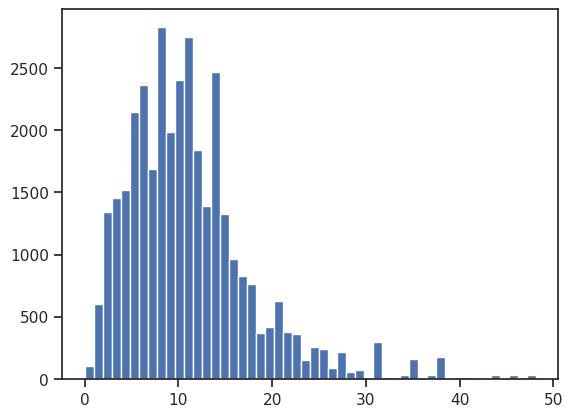

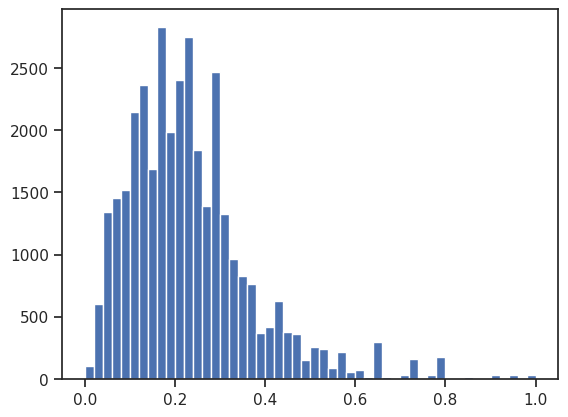

,Distance
count,34856.000000
mean,11.184929
std,6.788892
min,0.000000
25%,6.400000
50%,10.300000
75%,14.000000
max,48.100000


,0
count,34856.000000
mean,0.232535
std,0.141141
min,0.000000
25%,0.133056
50%,0.214137
75%,0.291060
max,1.000000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

input = data[['Distance']]
output = MinMaxScaler().fit_transform(input)

plt.hist(input, 50)
plt.show()

plt.hist(output, 50)
plt.show()

display(pd.DataFrame(input).describe())
display(pd.DataFrame(output).describe())

Особенности метода:
  * Среднее значение может варьироваться.
  * Среднеквадратичное отклонение может варьироваться.
  * Форма исходного распределения может изменяться.
  * Максимальные и минимальные значения в диапазоне [0;1].
  * Выбросы сохраняются.

## Масштабирование данных на основе Z-оценки - StandardScaler

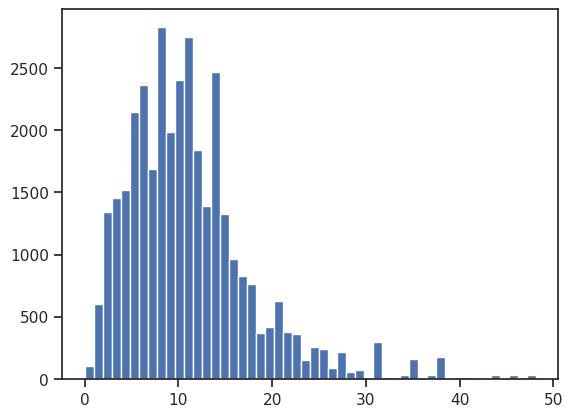

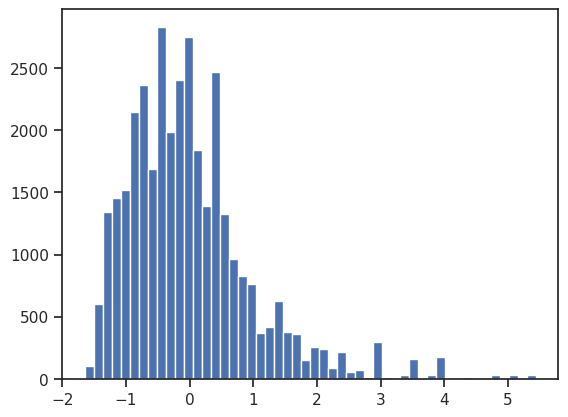

,Distance
count,34856.000000
mean,11.184929
std,6.788892
min,0.000000
25%,6.400000
50%,10.300000
75%,14.000000
max,48.100000


,0
count,3.485600e+04
mean,-1.761272e-16
std,1.000014e+00
min,-1.647557e+00
25%,-7.048275e-01
50%,-1.303515e-01
75%,4.146642e-01
max,5.437647e+00


In [31]:
input = data[['Distance']]
output = StandardScaler().fit_transform(input)

plt.hist(input, 50)
plt.show()

plt.hist(output, 50)
plt.show()

display(pd.DataFrame(input).describe())
display(pd.DataFrame(output).describe())

Особенности метода:
  * Среднее значение приводится к 0.
  * Среднеквадратичное отклонение приводится к 1.
  * Форма исходного распределения сохраняется.
  * Максимальные и минимальные значения могут варьироваться.
  * Выбросы сохраняются.

## Масштабирование по максимальному значению

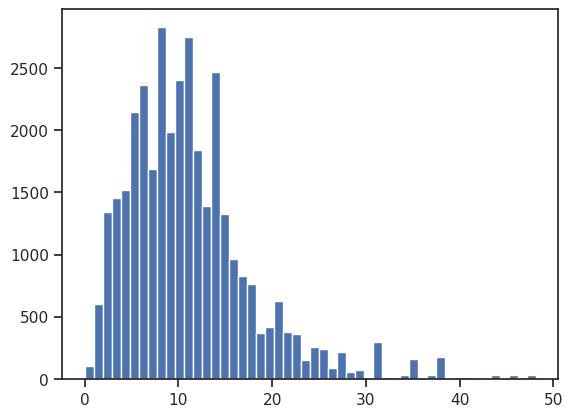

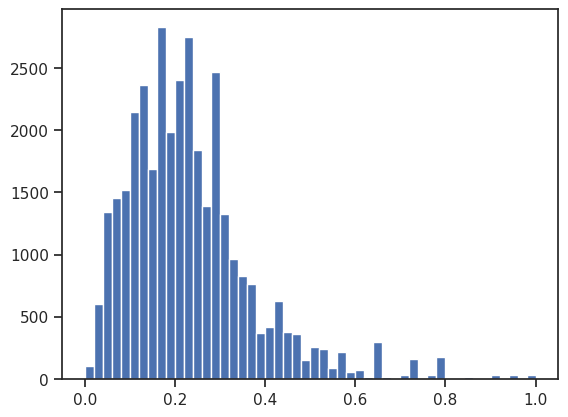

,Distance
count,34856.000000
mean,11.184929
std,6.788892
min,0.000000
25%,6.400000
50%,10.300000
75%,14.000000
max,48.100000


,0
count,34856.000000
mean,0.232535
std,0.141141
min,0.000000
25%,0.133056
50%,0.214137
75%,0.291060
max,1.000000


In [32]:
input = data[['Distance']]
output = MaxAbsScaler().fit_transform(input)

plt.hist(input, 50)
plt.show()

plt.hist(output, 50)
plt.show()

display(pd.DataFrame(input).describe())
display(pd.DataFrame(output).describe())

Особенности метода:
  * Среднеквадратичное отклонение не масштабируется.
  * Форма исходного распределения может изменяться.
  * Максимальные и минимальные значения в диапазоне [-1;1].

# Обработка выбросов

,BuildingArea
count,13742.00000
mean,160.25640
std,401.26706
min,0.00000
25%,102.00000
50%,136.00000
75%,188.00000
max,44515.00000


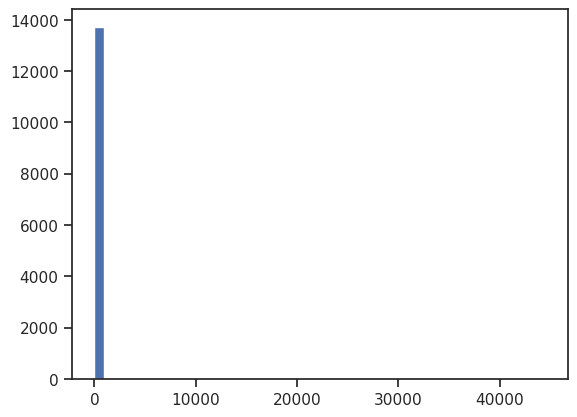

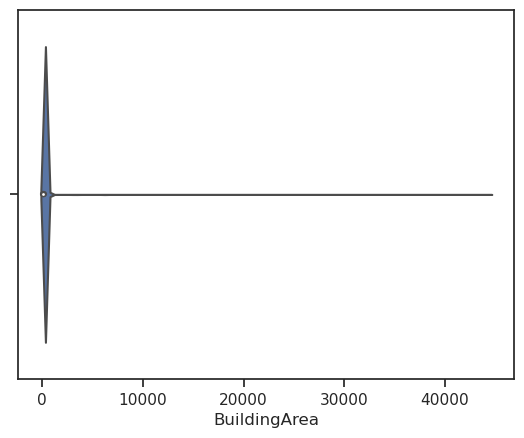

In [33]:
display(data[["BuildingArea"]].describe())

plt.hist(data[["BuildingArea"]], 50)
plt.show()

sns.violinplot(x=data["BuildingArea"]);

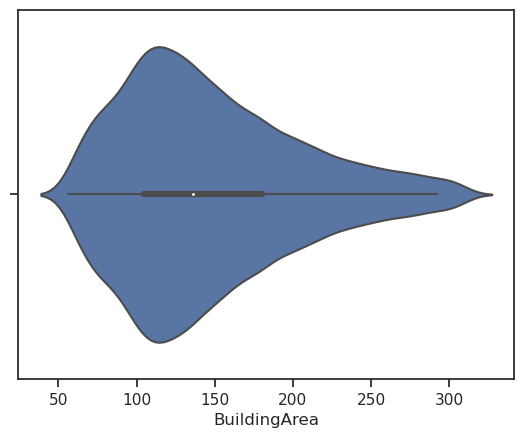

In [34]:
from enum import Enum
class OutlierBoundaryType(Enum):
  SIGMA = 1
  QUANTILE = 2
  IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
  if outlier_boundary_type == OutlierBoundaryType.SIGMA:
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
  elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
  elif outlier_boundary_type == OutlierBoundaryType.IRQ:
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
  else:
    raise NameError('Unknown Outlier Boundary Type')

  return lower_boundary, upper_boundary

lower_boundary, upper_boundary = get_outlier_boundaries(data, "BuildingArea", OutlierBoundaryType.QUANTILE)
outliers_temp = np.where(
  data["BuildingArea"] > upper_boundary,
  True,
  np.where(
    data["BuildingArea"] < lower_boundary,
    True,
    False
  )
)
data_trimmed = data.loc[~(outliers_temp),]
sns.violinplot(x=data_trimmed["BuildingArea"]);

,Landsize
count,23047.000000
mean,593.598993
std,3398.841946
min,0.000000
25%,224.000000
50%,521.000000
75%,670.000000
max,433014.000000


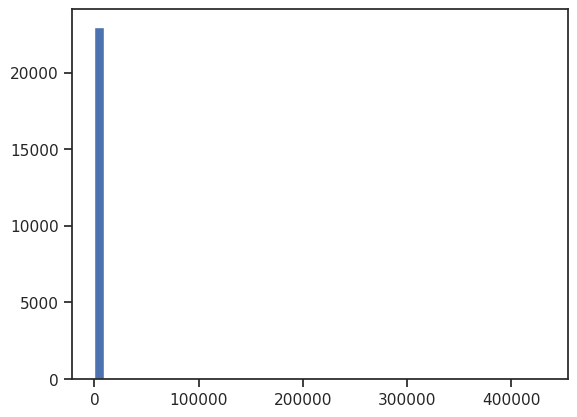

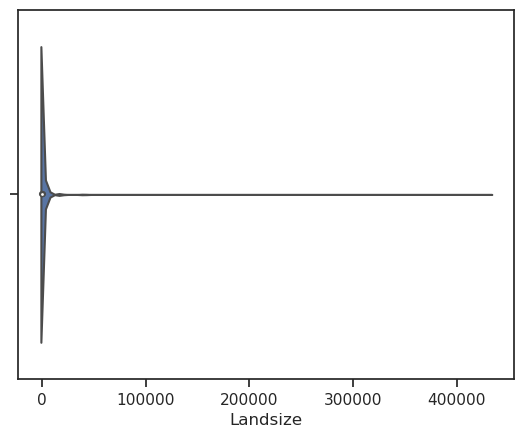

In [35]:
display(data[["Landsize"]].describe())

plt.hist(data[["Landsize"]], 50)
plt.show()

sns.violinplot(x=data["Landsize"]);

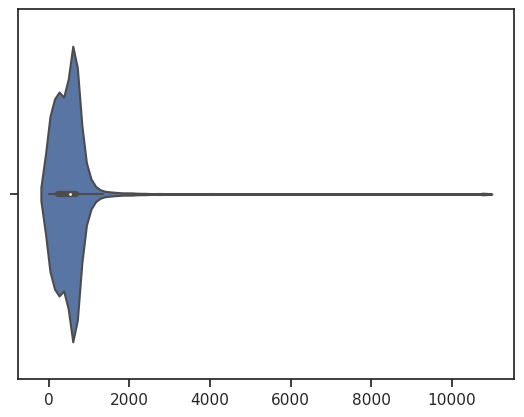

In [36]:
lower_boundary, upper_boundary = get_outlier_boundaries(data, "Landsize", OutlierBoundaryType.SIGMA)
data_replaced = np.where(
  data['Landsize'] > upper_boundary,
  upper_boundary,
  np.where(
    data['Landsize'] < lower_boundary,
    lower_boundary,
    data['Landsize'],
  )
)

sns.violinplot(x=data_replaced);

# Обработка нестандартного признака

In [37]:
display(data[['Date']], data[['Date']].dtypes)

,Date
0,3/09/2016
1,3/12/2016
2,4/02/2016
3,4/02/2016
4,4/03/2017
...,...
34852,24/02/2018
34853,24/02/2018
34854,24/02/2018
34855,24/02/2018


Date    object
dtype: object

In [38]:
data['Date'] = data.apply(lambda x: pd.to_datetime(x['Date'], format='%d/%m/%Y').timestamp(), axis=1)
display(data['Date'], data['Date'].dtypes)

0        1.472861e+09
1        1.480723e+09
2        1.454544e+09
3        1.454544e+09
4        1.488586e+09
             ...     
34852    1.519430e+09
34853    1.519430e+09
34854    1.519430e+09
34855    1.519430e+09
34856    1.519430e+09
Name: Date, Length: 34857, dtype: float64

dtype('float64')

# Отбор признаков

## Метод из группы методов фильтрации

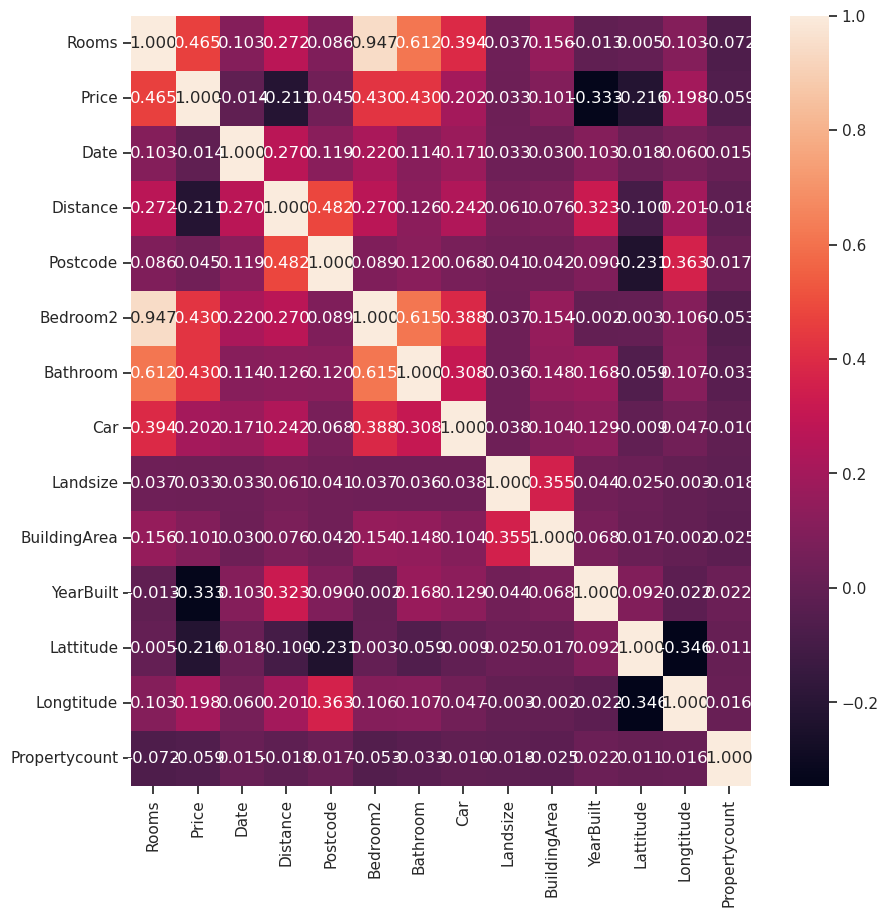

In [39]:
# Метод, основанный на корреляции

plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='.3f');

In [40]:
# Формирование DataFrame с сильными корреляциями
# Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
# Важно, чтобы признаки не коррелировали между собой.

def make_corr_df(df):
  cr = data.corr(numeric_only = True)
  cr = cr.abs().unstack()
  cr = cr.sort_values(ascending=False)
  cr = cr[cr >= 0.8]
  cr = cr[cr < 1]
  cr = pd.DataFrame(cr).reset_index()
  cr.columns = ['f1', 'f2', 'corr']
  return cr

In [41]:
make_corr_df(data)

,f1,f2,corr
0,Rooms,Bedroom2,0.946755
1,Bedroom2,Rooms,0.946755


## Метод из группы методов обертывания

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

dropped = data.dropna(axis=0, how='any')[["Car", "Bathroom", "BuildingArea", "Price", "Landsize", "Bedroom2", "Rooms", "Distance", "Postcode", "YearBuilt"]]

for c in dropped:
  print(f"{c} => {len(dropped[c].unique())}")

knn = KNeighborsClassifier(n_neighbors = 3)

efs1 = EFS(
  knn,
  min_features=2,
  max_features=4,
  scoring='accuracy',
  print_progress=True,
  cv=5
)

X = dropped.drop(columns = ['Price'])
Y = dropped[['Price']].squeeze()

efs1 = efs1.fit(X, Y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Car => 11
Bathroom => 9
BuildingArea => 593
Price => 1846
Landsize => 1237
Bedroom2 => 12
Rooms => 10
Distance => 201
Postcode => 194
YearBuilt => 143


/usr/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: Us

Best accuracy score: 0.01
Best subset (indices): (2, 6, 7, 8)
Best subset (corresponding names): ('BuildingArea', 'Distance', 'Postcode', 'YearBuilt')


## Метод из группы методов вложений

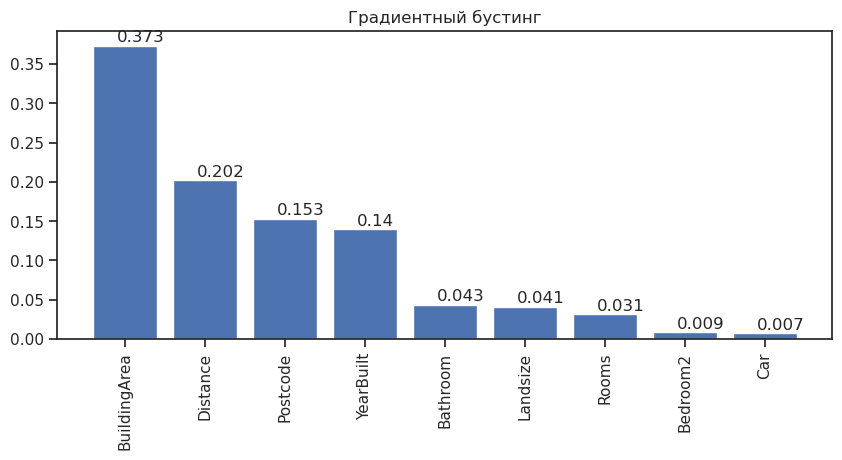

In [43]:
from operator import itemgetter
from sklearn.ensemble import GradientBoostingRegressor

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
  # Сортировка значений важности признаков по убыванию
  list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
  sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
  # Названия признаков
  labels = [x for x,_ in sorted_list]
  # Важности признаков
  data = [x for _,x in sorted_list]
  # Вывод графика
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_title(title)
  ind = np.arange(len(labels))
  plt.bar(ind, data)
  plt.xticks(ind, labels, rotation='vertical')
  # Вывод значений
  for a,b in zip(ind, data):
    plt.text(a-0.1, b+0.005, str(round(b,3)))
  plt.show()
  return labels, data

# Градиентный бустинг
gbr1 = GradientBoostingRegressor()
gbr1.fit(X, Y);

draw_feature_importances(gbr1, X, 'Градиентный бустинг', figsize=(10,4));